In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns

In [ ]:
# Section 1: COVID19 dataset & Libraries

In [ ]:
# Import all the relevant libraries and “Covid19_Confirmed_dataset.csv” dataset as a Data Frame.

In [2]:
Dataframe = pd.read_csv('time_series_covid_19_confirmed.csv',encoding='unicode_escape')
Dataframe.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,937,939,939,944,955,955,955,963,963,977
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,92,92,92,92,92,92,92,92,92,92
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,206743,213535,220682,228195,235677,241811,246499,253868,260911,268574
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,39102,39298,39586,39819,39985,40185,40410,40433,40593,40794
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,3809,3820,3832,3842,3851,3861,3875,3897,3915,3927


In [ ]:
# Drop ‘Lat’ & ‘Long’ columns. Grouped the data with ‘Country/Region ‘using sum as an aggregate function.

In [3]:
Dataframe.drop(["Lat","Long"],axis=1,inplace=True)

In [4]:
Dataframe.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
1,NaN,Albania,0,0,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,937,939,939,944,955,955,955,963,963,977
4,NaN,Angola,0,0,0,0,0,0,0,0,...,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,92,92,92,92,92,92,92,92,92,92
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,206743,213535,220682,228195,235677,241811,246499,253868,260911,268574
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,39102,39298,39586,39819,39985,40185,40410,40433,40593,40794
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,3809,3820,3832,3842,3851,3861,3875,3897,3915,3927


In [5]:
Dataframe_agg = Dataframe.groupby("Country/Region").sum()

In [6]:
Dataframe_agg.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
Albania,0,0,0,0,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817
Algeria,0,0,0,0,0,0,0,0,0,0,...,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699
Andorra,0,0,0,0,0,0,0,0,0,0,...,937,939,939,944,955,955,955,963,963,977
Angola,0,0,0,0,0,0,0,0,0,0,...,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,92,92,92,92,92,92,92,92,92,92
Argentina,0,0,0,0,0,0,0,0,0,0,...,206743,213535,220682,228195,235677,241811,246499,253868,260911,268574
Armenia,0,0,0,0,0,0,0,0,0,0,...,39102,39298,39586,39819,39985,40185,40410,40433,40593,40794
Australia,0,0,0,0,4,5,5,6,9,9,...,18730,19445,19890,20272,20698,21084,21397,21713,22127,22358


In [ ]:
# Task: Visualize the data for India, China & US countries

In [ ]:
# China

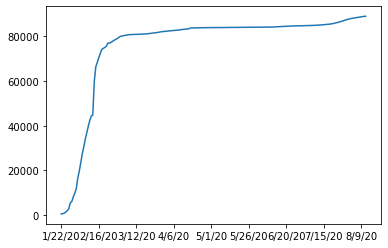

In [7]:
Dataframe_agg.loc["China"].plot()

In [ ]:
# India

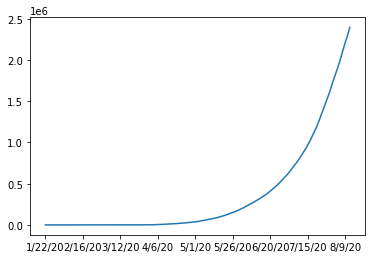

In [8]:
Dataframe_agg.loc["India"].plot()

In [ ]:
#  US

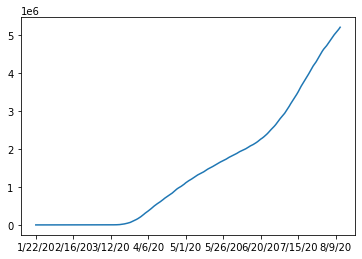

In [9]:
Dataframe_agg.loc["US"].plot()

In [ ]:
# India, China & US countries

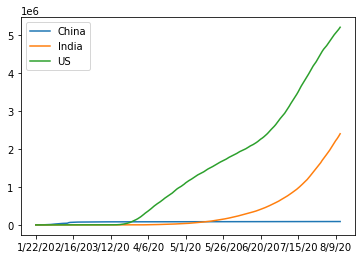

In [10]:
Dataframe_agg.loc["China"].plot()
Dataframe_agg.loc["India"].plot()
Dataframe_agg.loc["US"].plot()
plt.legend()

In [ ]:
# Section 2: Finding a good Measure

In [ ]:
# Hint: Find the first derivative for the data using diff() command (let’s call it an ‘Infection Rate’), calculate the maximum infection rate for India, China & US. You may plot the Infection Rate for some countries also for a better understanding of data

In [ ]:
# china

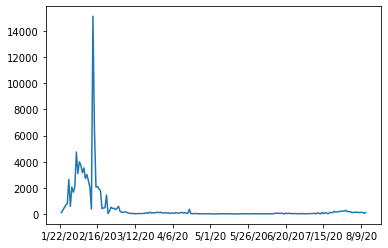

In [11]:
Dataframe_agg.loc["China"].diff().plot()

In [12]:
Dataframe_agg.loc["China"].diff().max()

15136.0

In [ ]:
# india

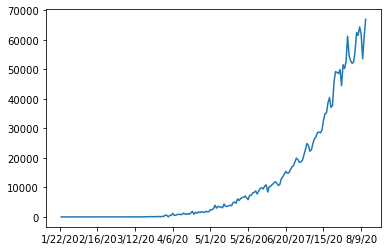

In [13]:
Dataframe_agg.loc["India"].diff().plot()

In [14]:
Dataframe_agg.loc["India"].diff().max()

66999.0

In [ ]:
# US

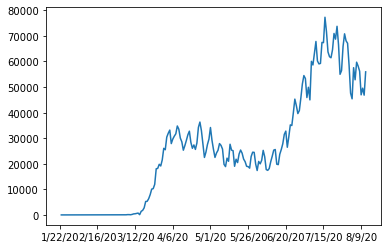

In [15]:
Dataframe_agg.loc["US"].diff().plot()

In [16]:
Dataframe_agg.loc["US"].diff().max()

77255.0

In [ ]:
# Task:Calculate the maximum ‘Infection Rate’ for each country and store it in a new column named ‘max_infection_rate’

In [17]:
countries = list(Dataframe_agg.index)
max_infection_rate = []
for con in countries :
    max_infection_rate.append(Dataframe_agg.loc[con].diff().max())
Dataframe_agg["max_infection_rate"] = max_infection_rate

In [ ]:
# new column named ‘max_infection_rate’

In [18]:
Dataframe_agg.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36782,36829,36896,37015,37054,37054,37162,37269,37345,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,5750,5889,6016,6151,6275,6411,6536,6676,6817,141.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,32504,33055,33626,34155,34693,35160,35712,36204,36699,675.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,939,939,944,955,955,955,963,963,977,79.0
Angola,0,0,0,0,0,0,0,0,0,0,...,1344,1395,1483,1538,1572,1672,1679,1735,1762,100.0
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,92,92,92,92,92,92,92,92,92,39.0
Argentina,0,0,0,0,0,0,0,0,0,0,...,213535,220682,228195,235677,241811,246499,253868,260911,268574,7663.0
Armenia,0,0,0,0,0,0,0,0,0,0,...,39298,39586,39819,39985,40185,40410,40433,40593,40794,771.0
Australia,0,0,0,0,4,5,5,6,9,9,...,19445,19890,20272,20698,21084,21397,21713,22127,22358,716.0


In [ ]:
# Create a New Data Frame name ‘Corona Data’ with ‘Country/Region’ as an index and ‘max_infection_rate’ as a column

In [19]:
corona_data = pd.DataFrame(Dataframe_agg["max_infection_rate"])

In [20]:
corona_data.head(10)

,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,141.0
Algeria,675.0
Andorra,79.0
Angola,100.0
Antigua and Barbuda,39.0
Argentina,7663.0
Armenia,771.0
Australia,716.0


In [ ]:
# Section 3: World happiness report dataset

In [ ]:
# hint: Import the Worldwide_happiness_report.csv file as happiness_report.

In [21]:
happiness_report = pd.read_csv("worldwide_happiness_report.csv")
happiness_report.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [ ]:
# Drop 'Overall rank', 'Score', 'Generosity', 'Perceptions of corruption' columns. Set ‘Country or region’ column as Index

In [22]:
drop_cols = ['Overall rank', 'Score', 'Generosity', 'Perceptions of corruption']

In [23]:
happiness_report.drop(drop_cols, axis=1, inplace=True)
happiness_report.head(10)

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557
5,Switzerland,1.452,1.526,1.052,0.572
6,Sweden,1.387,1.487,1.009,0.574
7,New Zealand,1.303,1.557,1.026,0.585
8,Canada,1.365,1.505,1.039,0.584
9,Austria,1.376,1.475,1.016,0.532


In [24]:
happiness_report.set_index("Country or region",inplace=True)
happiness_report.head(10)

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557
Switzerland,1.452,1.526,1.052,0.572
Sweden,1.387,1.487,1.009,0.574
New Zealand,1.303,1.557,1.026,0.585
Canada,1.365,1.505,1.039,0.584


In [25]:
corona_data.head(10)

,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,141.0
Algeria,675.0
Andorra,79.0
Angola,100.0
Antigua and Barbuda,39.0
Argentina,7663.0
Armenia,771.0
Australia,716.0


In [26]:
corona_data.shape

(188, 1)

In [27]:
happiness_report.head(10)

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557
Switzerland,1.452,1.526,1.052,0.572
Sweden,1.387,1.487,1.009,0.574
New Zealand,1.303,1.557,1.026,0.585
Canada,1.365,1.505,1.039,0.584


In [28]:
happiness_report.shape

(156, 4)

In [ ]:
# Task:Create a DataFrame named ‘data’ by merging ‘happiness_report’ with ‘Corona Data’ and find correlation among all variables

In [29]:
data = corona_data.join(happiness_report,how='inner')
data.head(10)

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,141.0,0.947,0.848,0.874,0.383
Algeria,675.0,1.002,1.160,0.785,0.086
Argentina,7663.0,1.092,1.432,0.881,0.471
Armenia,771.0,0.850,1.055,0.815,0.283
Australia,716.0,1.372,1.548,1.036,0.557
Austria,1321.0,1.376,1.475,1.016,0.532
Azerbaijan,590.0,1.043,1.147,0.769,0.351
Bahrain,786.0,1.362,1.368,0.871,0.536
Bangladesh,4019.0,0.562,0.928,0.723,0.527


In [30]:
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.100475,0.067720,0.088250,0.088359
GDP per capita,0.100475,1.000000,0.757521,0.859431,0.394799
Social support,0.067720,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.088250,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,0.088359,0.394799,0.456317,0.423146,1.000000


In [ ]:
# Section5: Visualization of results using Seaborn.

In [31]:
data.head(10)

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,141.0,0.947,0.848,0.874,0.383
Algeria,675.0,1.002,1.160,0.785,0.086
Argentina,7663.0,1.092,1.432,0.881,0.471
Armenia,771.0,0.850,1.055,0.815,0.283
Australia,716.0,1.372,1.548,1.036,0.557
Austria,1321.0,1.376,1.475,1.016,0.532
Azerbaijan,590.0,1.043,1.147,0.769,0.351
Bahrain,786.0,1.362,1.368,0.871,0.536
Bangladesh,4019.0,0.562,0.928,0.723,0.527


In [ ]:
# Hint: Plotting GDP vs maximum Infection rate

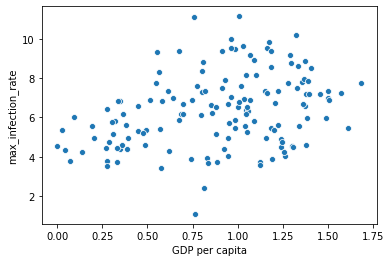

In [32]:
x = data["GDP per capita"]
y = data["max_infection_rate"]
sns.scatterplot(x,np.log(y))

In [ ]:
# Plotting Social support vs maximum Infection rate

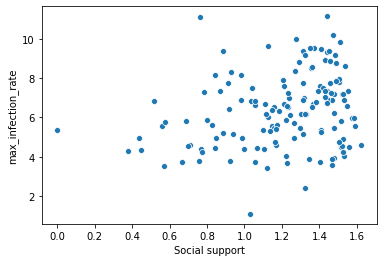

In [33]:
x = data["Social support"]
y = data["max_infection_rate"]
sns.scatterplot(x,np.log(y))

In [ ]:
# Plotting Healthy life expectancy vs maximum Infection rate

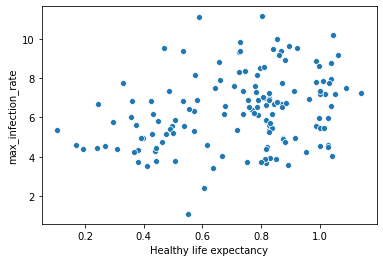

In [34]:
x = data["Healthy life expectancy"]
y = data["max_infection_rate"]
sns.scatterplot(x,np.log(y))

In [ ]:
# Plotting Freedom to make life choices vs maximum Infection rate

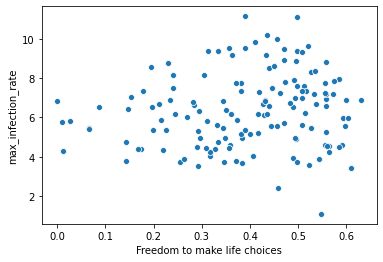

In [35]:
x = data["Freedom to make life choices"]
y = data["max_infection_rate"]
sns.scatterplot(x,np.log(y))

In [ ]:
# Section 4: Visualization using Folium Map

In [ ]:
# Hint: You may use Latitude & Longitude information available at COVID19 data set.

In [ ]:
# Task: Add the Latitude & Longitude information of countries in ‘data’ and Visualize it using Folium world map

In [36]:
locations = {
    "Afghanistan":[33.93911,67.70995],
    "Albania":[41.1533,20.1683],
    "Algeria":[28.0339,1.6596],
    "Andorra":[42.5063,1.5218],
    "Angola":[-11.2027,17.8739],
    "Antigua and Barbuda":[17.0608,-61.7964],
    "Argentina":[-38.4161,-63.6167],
    "Armenia":[40.0691,45.0382],
    "Australia":[-35.4735,149.0124],
    "Austria":[47.5162,14.5501],
    "Azerbaijan":[40.1431,47.5769],
    "Bahamas":[25.02589,-78.0359],
    "Bahrain":[26.0275,50.55],
    "Bangladesh":[23.685,90.3563],
    "Barbados":[13.1939,-59.5432],
    "Belarus":[53.7098,27.9534],
    "Belgium":[50.8333,4.469936],
    "Belize":[17.1899,-88.4976],
    "Benin":[9.3077,2.3158],
    "Bhutan":[27.5142,90.4336],
    "Bolivia":[-16.2902,-63.5887],
    "Bosnia and Herzegovina":[43.9159,17.6791],
    "Botswana":[-22.3285,24.6849],
    "Brazil":[-14.235,-51.9253],
    "Brunei":[4.5353,114.7277],
    "Bulgaria":[42.7339,25.4858],
    "Burkina Faso":[12.2383,-1.5616],
    "Burma":[21.9162,95.956],
    "Burundi":[-3.3731,29.9189],
    "Cabo Verde":[16.5388,-23.0418],
    "Cambodia":[11.55,104.9167],
    "Cameroon":[3.848,11.5021],
    "Canada":[64.2823,-135],
    "Central African Republic":[6.6111,20.9394],
    "Chad":[15.4542,18.7322],
    "Chile":[-35.6751,-71.543],
    "China":[31.8257,117.2264],
    "Colombia":[4.5709,-74.2973],
    "Comoros":[-11.6455,43.3333],
    "Congo (Brazzaville)":[-0.228,15.8277],
    "Congo (Kinshasa)":[-4.0383,21.7587],
    "Costa Rica":[9.7489,-83.7534],
    "Cote d Ivoire":[7.54,-5.5471],
    "Croatia":[45.1,15.2],
    "Cuba":[21.52176,-77.7812],
    "Cyprus":[35.1264,33.4299],
    "Czechia":[49.8175,15.473],
    "Denmark":[61.8926,-6.9118],
    "Diamond Princess":[0,0],
    "Djibouti":[11.8251,42.5903],
    "Dominica":[15.415,-61.371],
    "Dominican Republic":[18.7357,-70.1627],
    "Ecuador":[-1.8312,-78.1834],
    "Egypt":[26.82055,30.8025],
    "El Salvador":[13.7942,-88.8965],
    "Equatorial Guinea":[1.6508,10.2679],
    "Eritrea":[15.1794,39.7823],
    "Estonia":[58.5953,25.0136],
    "Eswatini":[-26.5225,31.4659],
    "Ethiopia":[9.145,40.4897],
    "Fiji":[-17.7134,178.065],
    "Finland":[61.92411,25.74815],
    "France":[3.9339,-53.1258],
    "Gabon":[-0.8037,11.6094],
    "Gambia":[13.4432,-15.3101],
    "Georgia":[42.3154,43.3569],
    "Germany":[51.16569,10.45153],
    "Ghana":[7.9465,-1.0232],
    "Greece":[39.0742,21.8243],
    "Grenada":[12.1165,-61.679],
    "Guatemala":[15.7835,-90.2308],
    "Guinea":[9.9456,-9.6966],
    "Guinea-Bissau":[11.8037,-15.1804],
    "Guyana":[4.860416,-58.9302],
    "Haiti":[18.9712,-72.2852],
    "Holy See":[41.9029,12.4534],
    "Honduras":[15.2,-86.2419],
    "Hungary":[47.1625,19.5033],
    "Iceland":[64.9631,-19.0208],
    "India":[20.59368,78.96288],
    "Indonesia":[-0.7893,113.9213],
    "Iran":[32.42791,53.68805],
    "Iraq":[33.22319,43.67929],
    "Ireland":[53.1424,-7.6921],
    "Israel":[31.04605,34.85161],
    "Italy":[41.87194,12.56738],
    "Jamaica":[18.1096,-77.2975],
    "Japan":[36.20482,138.2529],
    "Jordan":[31.24,36.51],
    "Kazakhstan":[48.0196,66.9237],
    "Kenya":[-0.0236,37.9062],
    "Korea, South":[35.90776,127.7669],
    "Kosovo":[42.60264,20.90298],
    "Kuwait":[29.31166,47.48177],
    "Kyrgyzstan":[41.20438,74.7661],
    "Laos":[19.85627,102.4955],
    "Latvia":[56.8796,24.6032],
    "Lebanon":[33.8547,35.8623],
    "Lesotho":[-29.61,28.2336],
    "Liberia":[6.428055,-9.4295],
    "Libya":[26.3351,17.22833],
    "Liechtenstein":[47.14,9.55],
    "Lithuania":[55.1694,23.8813],
    "Luxembourg":[49.8153,6.1296],
    "MS Zaandam":[0,0],
    "Madagascar":[-18.7669,46.86911],
    "Malawi":[-13.2543,34.3015],
    "Malaysia":[4.210484,101.9758],
    "Maldives":[3.2028,73.2207],
    "Mali":[17.57069,-3.99617],
    "Malta":[35.9375,14.3754],
    "Mauritania":[21.0079,-10.9408],
    "Mauritius":[-20.3484,57.55215],
    "Mexico":[23.6345,-102.553],
    "Moldova":[47.4116,28.3699],
    "Monaco":[43.7333,7.4167],
    "Mongolia":[46.8625,103.8467],
    "Montenegro":[42.70868,19.37439],
    "Morocco":[31.7917,-7.0926],
    "Mozambique":[-18.6657,35.52956],
    "Namibia":[-22.9576,18.4904],
    "Nepal":[28.1667,84.25],
    "Netherlands":[12.5211,-69.9683],
    "New Zealand":[-40.9006,174.886],
    "Nicaragua":[12.86542,-85.2072],
    "Niger":[17.60779,8.081666],
    "Nigeria":[9.082,8.6753],
    "North Macedonia":[41.6086,21.7453],
    "Norway":[60.472,8.4689],
    "Oman":[21.51258,55.92326],
    "Pakistan":[30.3753,69.3451],
    "Panama":[8.538,-80.7821],
    "Papua New Guinea":[-6.31499,143.9556],
    "Paraguay":[-23.4425,-58.4438],
    "Peru":[-9.19,-75.0152],
    "Philippines":[12.87972,121.774],
    "Poland":[51.9194,19.1451],
    "Portugal":[39.3999,-8.2245],
    "Qatar":[25.3548,51.1839],
    "Romania":[45.9432,24.9668],
    "Russia":[61.52401,105.3188],
    "Rwanda":[-1.9403,29.8739],
    "Saint Kitts and Nevis":[17.35782,-62.783],
    "Saint Lucia":[13.9094,-60.9789],
    "Saint Vincent and the Grenadines":[12.9843,-61.2872],
    "San Marino":[43.9424,12.4578],
    "Sao Tome and Principe":[0.1864,6.6131],
    "Saudi Arabia":[23.88594,45.07916],
    "Senegal":[14.4974,-14.4524],
    "Serbia":[44.0165,21.0059],
    "Seychelles":[-4.6796,55.492],
    "Sierra Leone":[8.460555,-11.7799],
    "Singapore":[1.2833,103.8333],
    "Slovakia":[48.669,19.699],
    "Slovenia":[46.1512,14.9955],
    "Somalia":[5.152149,46.19962],
    "South Africa":[-30.5595,22.9375],
    "South Sudan":[6.877,31.307],
    "Spain":[40.46367,-3.74922],
    "Sri Lanka":[7.873054,80.7718],
    "Sudan":[12.8628,30.2176],
    "Suriname":[3.9193,-56.0278],
    "Sweden":[60.12816,18.6435],
    "Switzerland":[46.8182,8.2275],
    "Syria":[34.80208,38.99682],
    "Taiwan":[23.7,121],
    "Tajikistan":[38.861,71.2761],
    "Tanzania":[-6.36903,34.88882],
    "Thailand":[15.87003,100.9925],
    "Timor-Leste":[-8.87422,125.7275],
    "Togo":[8.6195,0.8248],
    "Trinidad and Tobago":[10.6918,-61.2225],
    "Tunisia":[33.88692,9.537499],
    "Turkey":[38.9637,35.2433],
    "US":[40,-100],
    "Uganda":[1.373333,32.29028],
    "Ukraine":[48.3794,31.1656],
    "United Arab Emirates":[23.42408,53.84782],
    "United Kingdom":[18.2206,-63.0686],
    "Uruguay":[-32.5228,-55.7658],
    "Uzbekistan":[41.37749,64.58526],
    "Venezuela":[6.4238,-66.5897],
    "Vietnam":[14.05832,108.2772],
    "West Bank and Gaza":[31.9522,35.2332],
    "Western Sahara":[24.2155,-12.8858],
    "Yemen":[15.55273,48.51639],
    "Zambia":[-13.1339,27.84933],
    "Zimbabwe":[-19.0154,29.15486],

}

In [37]:
data['Lat'] = ""
data['Long'] = ""
for index in data.index:
    data.loc[data.index==index,'Lat'] = locations[index][0]
    data.loc[data.index==index,'Long'] = locations[index][1]

In [38]:
data.head(10)

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Lat,Long
Afghanistan,915.0,0.350,0.517,0.361,0.000,33.9391,67.71
Albania,141.0,0.947,0.848,0.874,0.383,41.1533,20.1683
Algeria,675.0,1.002,1.160,0.785,0.086,28.0339,1.6596
Argentina,7663.0,1.092,1.432,0.881,0.471,-38.4161,-63.6167
Armenia,771.0,0.850,1.055,0.815,0.283,40.0691,45.0382
Australia,716.0,1.372,1.548,1.036,0.557,-35.4735,149.012
Austria,1321.0,1.376,1.475,1.016,0.532,47.5162,14.5501
Azerbaijan,590.0,1.043,1.147,0.769,0.351,40.1431,47.5769
Bahrain,786.0,1.362,1.368,0.871,0.536,26.0275,50.55
Bangladesh,4019.0,0.562,0.928,0.723,0.527,23.685,90.3563


In [40]:
world_map = folium.Map()
world_map

In [ ]:
# Visualize it using Folium world map

In [41]:
for i in range(0,len(data[data['max_infection_rate']>0].index)):
    folium.Circle(
        location=[data.iloc[i]['Lat'],data.iloc[i]['Long']],
        tooltip = "<h5>"+data.iloc[i].name+"</h5>"+
        "<li>max_infection_rate:"+str(data.iloc[i]['max_infection_rate'])+"</li>"+
        "<li>GDP per capita:"+str(data.iloc[i]['GDP per capita'])+"</li>"+
        "<li>Social support:"+str(data.iloc[i]['Social support'])+"</li>"+
        "<li>Healthy life expectancy:"+str(data.iloc[i]['Healthy life expectancy'])+"</li>"+
        "<li>Freedom to make life choices:"+str(data.iloc[i]['Freedom to make life choices'])+"</li>",
        
        radius = (int((data.iloc[i]['max_infection_rate']))*0.5),
        color = '#ff6600',
        fill_color = '#ff6600',
        fill=True).add_to(world_map)
world_map